#  US Gap Analysis Project - WV Breeding Bird Atlas Data Comparison 
Nathan Tarr and Jessie Jordan

## Cover type associations in West Virginia
We investigated the agreement between WV Breeding Bird Atlas (2011-2015) and USGS Gap Analysis Project data on 

In [12]:
# Define a species ----------------------------------------------------------
species = 'Yellow-billed Cuckoo'

In [13]:
import pandas as pd
import repo_functions as fun
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 15)

# Load land cover crosswalk - slow loading for some reason
cross = pd.read_csv(fun.dataDir + "LandCover/land_cover_crosswalk.csv", header=0, dtype={'GAP_code': str}) 

In [14]:
# Perform crosswalk of detections from WV -> USGAP
master, GAP_linked, unmatched, gap_types, wv_types = fun.cross_to_GAP(species, cross)


System associations in the GAP model
                                                                  GAP_name
GAP_code                                                                  
4104               Northeastern Interior Dry Oak Forest-Hardwood Modifier*
4104               Northeastern Interior Dry Oak Forest-Hardwood Modifier*
4106                 Northeastern Interior Dry Oak Forest - Mixed Modifier
4114                            Northeastern Interior Dry-Mesic Oak Forest
4114                            Northeastern Interior Dry-Mesic Oak Forest
4114                            Northeastern Interior Dry-Mesic Oak Forest
4119                         Southern Appalachian Northern Hardwood Forest
4119                         Southern Appalachian Northern Hardwood Forest
4119                         Southern Appalachian Northern Hardwood Forest
4125                           Southern and Central Appalachian Oak Forest
4125                           Southern and Central Appalachia

In [15]:
# Show validated associations ------------------------------------------------
print("Validated associations")
df_valid = master[master['evaluation'] == 'valid']
print(df_valid[['GAP_code', 'GAP_name', 'detections']])

Validated associations
   GAP_code                                       GAP_name  detections
9      4119  Southern Appalachian Northern Hardwood Forest        14.0
13     4202                 Southern Piedmont Mesic Forest        15.0
24     4335    Central Appalachian Pine-Oak Rocky Woodland         3.0
39     8504                                 Ruderal forest        39.0


In [16]:
# Show supported additions ---------------------------------------------------
print("New GAP ecological system associations that are supported by WVBBA:")
df_add = master[master['evaluation'] == 'add_association']
print(df_add[['GAP_code', 'GAP_name', 'detections']])

New GAP ecological system associations that are supported by WVBBA:
  GAP_code     GAP_name  detections
3     1403  Pasture/Hay         3.0


In [17]:
# Show invalid WV codes entered ----------------------------------------------
print("Invalid habitat codes entered by WVBBA observers:")
print(unmatched)

Invalid habitat codes entered by WVBBA observers:
{'17': 12.0, '3a': 3.0}


                      detections
Unusable                   149.0
Supported validation        71.0
Supported addition           3.0
Total detections           223.0


Text(0, 0.5, '')

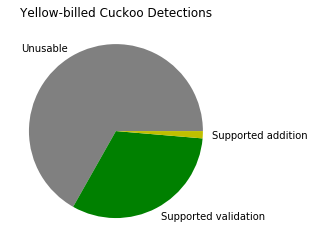

In [18]:
# Report and plot results for usable detections ------------------------------
usable_df = pd.DataFrame(index=["Unusable", "Supported validation", "Supported addition", "Total detections"], 
                         columns=["detections"])
usable_df.loc['Supported validation', 'detections'] = int(df_valid[['detections']].sum())
usable_df.loc['Supported addition', 'detections'] = int(df_add[['detections']].sum())
usable_df.loc['Total detections', 'detections'] = wv_types['detections'].sum()
usable_df.loc['Unusable', 'detections'] = int(wv_types['detections'].sum() - df_valid[['detections']].sum() - df_add[['detections']].sum())
usable_df = usable_df.fillna(0)
print(usable_df)
plt1 = usable_df.drop(['Total detections']).plot(y='detections', kind='pie',
                                                 legend=False, 
                                                 title = species + " Detections",
                                                 colors=['gray', 'g', 'y'])
plt1.set_ylabel("")

             GAP_types
Unvalidated         32
Validated            4
Additions            1


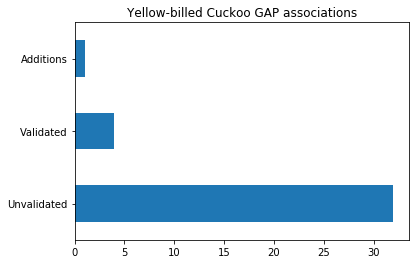

In [19]:
# Report and plot results for proportion of GAP systems validated ------------------------------
eval_df = pd.DataFrame(index=["Unvalidated", "Validated", "Additions"], columns=["GAP_types"])
eval_df.loc['Unvalidated', "GAP_types"] = len(gap_types) - len(df_valid)
eval_df.loc['Validated', "GAP_types"] = len(df_valid)
eval_df.loc['Additions', "GAP_types"] = len(df_add)
eval_df = eval_df.fillna(0)
print(eval_df)
plt2 = eval_df.plot(y='GAP_types', kind='barh', legend=False, title = species + " GAP associations")